# Annotate the final dataset

**Goal:** This notebook annotates the final dataset obtained at the end of [`get_final_dataset.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/compute_final_dataset/get_final_dataset.ipynb), by adding some features. It follows the progression of the [`annotate_cleaned_dataset.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/first_study/annotate_cleaned_dataset.ipynb) notebook, used to annotate the cleaned dataset. All the operations made are stored in the [`compute_final_dataset.R`](https://github.com/ElsaB/impact-annotator/blob/master/data/utils/compute_final_dataset.R) file, and can be applied on the raw dataset by using the `annotate_final_dataset()` function.

This notebook is divided in 4 parts:
* **1. `Kaviar_AF`**
* **2. `OncoKB annotations`**
* **3. `CancerGenesList`**
* **2. Compare with the old impact**

In [1]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”

In [2]:
impact <- read.table("../../../data/final_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [3]:
nrow(impact)

[1] 194211

## `Kaviar_AF`

Get the `Kaviar_AF` feature from `all_IMPACT_mutations_180508.simple.hg19_multianno.txt` (impact annotated by Dominik).

### Get the raw data

In [4]:
impact_kaviar <- read.table("../../../data/dominik/all_IMPACT_mutations_180508.simple.hg19_multianno.txt",
                            sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [5]:
ncol(impact_kaviar)
nrow(impact_kaviar)
head(impact_kaviar)

[1] 44

[1] 588547

Chr,Start,End,Ref,Alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm.MKL_coding_score,fathmm.MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP.._RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,X1000g2015aug_all,Kaviar_AF,Kaviar_AC,Kaviar_AN,cosmic70
1,16265908,16265908,A,T,0.0,D,0.999,D,0.982,D,.,.,1.000,D,2.275,M,1.9,T,-3.37,D,0.897,5.149,25.4,0.962,0.979,D,-0.869,T,0.155,T,0.672,0,4.81,1.062,1.199,1.000,1.000,12.000,.,.,.,.,.
2,29543736,29543736,A,G,0.539,T,0.0,B,0.0,B,0.151,N,1,D,0,N,4.55,T,0.34,N,0.117,-0.045,2.178,0.629,0.059,N,-0.779,T,0.001,T,0.428,0,2.96,-0.056,0.117,0.186,0.336,6.380,0.0159744,0.0300125,4640,154602,ID=COSM3758202;OCCURENCE=1(large_intestine)
2,242793433,242793433,G,A,0.019,D,0.816,P,0.261,B,0.072,N,1,P,1.185,L,-0.1,T,-1.18,N,0.275,1.737,14.62,0.989,0.037,N,-0.921,T,0.000,T,0.635,0,2.9,0.868,0.782,0.013,0.002,7.501,0.136781,0.0760792,11762,154602,.
5,56177843,56177843,C,G,0.002,D,0.102,B,0.078,B,0.000,D,0.978,N,0,N,1.46,T,-0.13,N,0.086,2.995,22.2,0.960,0.939,D,-1.043,T,0.012,T,0.707,0,3.87,0.871,0.935,0.982,0.984,13.098,0.00738818,0.0141072,2181,154602,.
5,180030313,180030313,C,A,0.65,T,0.0,B,0.001,B,.,.,1,P,0.345,N,-0.86,T,0.12,N,0.038,0.068,3.268,0.393,0.034,N,-1.077,T,0.004,T,0.646,0,-8.82,0.021,-1.521,0.004,0.001,2.012,.,0.0789964,12213,154602,.
5,180051003,180051003,T,C,0.225,T,0.029,B,0.015,B,.,.,1.000,P,1.155,L,-3.42,D,-0.79,N,0.092,-0.877,0.029,0.804,0.078,N,-0.720,T,0.028,T,0.701,0,2.25,0.079,0.888,0.897,0.281,5.808,0.0529153,0.0911566,14093,154602,.


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_kaviar`. The keys will be: 
* `mut_key` for `impact`
* `Chr`\_`Start`\_`Ref`\_`Alt` for `impact_kaviar`

In [6]:
# create the impact_kaviar join_key
impact_kaviar$join_key <- paste(impact_kaviar$Chr,
                                impact_kaviar$Start,
                                impact_kaviar$Ref,
                                impact_kaviar$Alt,
                                sep = '_')

**Verification 1** The feature `Kaviar_AF` is unique for each `join_key`:

In [7]:
impact_kaviar <- unique(impact_kaviar[, c("join_key", "Kaviar_AF")])
impact_kaviar %>% group_by(join_key) %>% filter(n() > 1)

join_key,Kaviar_AF


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_kaviar`:

In [8]:
nrow(impact[! impact$mut_key %in% impact_kaviar$join_key,])

[1] 0

In [9]:
impact <- left_join(impact, impact_kaviar[, c("join_key", "Kaviar_AF")], by = c("mut_key" = "join_key"))

### `Kaviar_AF`

We assume every value `'.'` of the `Kaviar_AF` feature is 0 (ie `'0'`). We convert every `Kaviar_AF` string to a double, to obtain the final feature.

In [10]:
dd <- head(unique(impact$Kaviar_AF), 10)
dd[dd == '.'] <- "0"
dd <- data.frame(dd, sapply(dd, function(s) as.double(s)), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
0,0.0000000
6.5e-06,0.0000065
1.29e-05,0.0000129
5.17e-05,0.0000517
0.0006404,0.0006404
0.0021863,0.0021863
5.82e-05,0.0000582
0.0005757,0.0005757
0.0010931,0.0010931
2.59e-05,0.0000259


In [11]:
impact$Kaviar_AF[impact$Kaviar_AF == '.'] <- "0"
impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))

## OncoKB annotations

Get the `is_a_hotspot`,`is_a_3d_hotspot` and `oncogenic` features from `oncokb_annotated_final_IMPACT_mutations_180508.txt` (impact annotated with oncokb-annotator, see [`/data/annotate_with_oncokb_final_dataset`](https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_oncokb_final_dataset).

### Get the raw data

In [12]:
impact_oncokb <- read.table("../../../data/annotate_with_oncokb_final_dataset/oncokb_annotated_final_IMPACT_mutations_180508.txt",
                             sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [13]:
ncol(impact_oncokb)
nrow(impact_oncokb)
head(impact_oncokb)

[1] 19

[1] 132275

mut_key,Hugo_Symbol,VEP_Consequence,VEP_VARIANT_CLASS,HGVSp_Short,Variant_Classification,is.a.hotspot,is.a.3d.hotspot,mutation_effect,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level,citations
17_7577515_T_G,TP53,missense_variant,SNV,p.T256P,Missense_Mutation,,,Likely Loss-of-function,Likely Oncogenic,NA,NA,,NA,,,NA,,8023157;11900253
1_46521514_G_C,PIK3R3,missense_variant,SNV,p.I298M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
3_142178126_C_A,ATR,missense_variant,SNV,p.R2431M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
4_55139732_T_A,PDGFRA,missense_variant,SNV,p.L465M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
4_153249542_C_A,FBXW7,splice_acceptor_variant,SNV,unknown,Splice_Site,,,,Likely Oncogenic,NA,NA,,NA,,,NA,,
4_153332775_C_A,FBXW7,stop_gained,SNV,p.G61*,Nonsense_Mutation,,,,Likely Oncogenic,NA,NA,,NA,,,NA,,


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_oncokb`. The keys will be `mut_key` for both dataset, and are already created.

**Verification 1** The features `oncogenic`, `is.a.hotspot`, and `is.a.3d.hotspot` are unique for each `mut_key`:

In [14]:
impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
impact_oncokb %>% group_by(mut_key) %>% filter(n() > 1) %>% arrange(mut_key)

mut_key,is.a.hotspot,is.a.3d.hotspot,oncogenic


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_oncokb`:

In [15]:
nrow(impact[! impact$mut_key %in% impact_oncokb$mut_key,])

[1] 0

In [16]:
impact <- left_join(impact, impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")], by = c("mut_key" = "mut_key"))

### Process raw features

**`is_a_hotspot`**

In [17]:
colnames(impact)[colnames(impact) == "is.a.hotspot"] <- "is_a_hotspot"
impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"
get_table(impact$is_a_hotspot)

values,count,freq
unknown,169623,87.3%
yes,24588,12.7%
-- total --,194211,100%


**`is_a_3d_hotspot`**

In [18]:
colnames(impact)[colnames(impact) == "is.a.3d.hotspot"] <- "is_a_3d_hotspot"
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"
get_table(impact$is_a_3d_hotspot)

values,count,freq
unknown,179427,92.4%
yes,14784,7.6%
-- total --,194211,100%


**`oncogenic`**

In [19]:
impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
get_table(impact$oncogenic)

values,count,freq
Unknown,128358,66.1%
Likely Oncogenic,48011,24.7%
Oncogenic,14247,7.3%
Predicted Oncogenic,2715,1.4%
Inconclusive,504,0.3%
Likely Neutral,376,0.2%
-- total --,194211,100%


## CancerGenesList

Get the `gene_type` feature from `CancerGenesList.txt` (downloaded from http://oncokb.org/#/cancerGenes, the upper right button "CANCER GENE LIST").

### Get the raw data

In [20]:
cancer_genes_list <- read.table("../../../data/other_databases/CancerGenesList.txt",
                                sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')

In [21]:
ncol(cancer_genes_list)
nrow(cancer_genes_list)
head(cancer_genes_list)

[1] 11

[1] 1019

Hugo.Symbol,X..of.occurence.within.resources,OncoKB.Annotated,OncoKB.Oncogene,OncoKB.TSG,MSK.IMPACT,MSK.HEME,Foundation.One,Foundation.One.Heme,Vogelstein,Sanger.CGC
ABL1,7,Yes,Yes,,Yes,Yes,Yes,Yes,Yes,Yes
ABL2,3,No,,,No,No,Yes,Yes,No,Yes
ACTB,1,No,,,No,No,No,Yes,No,No
ACTG1,1,No,,,No,Yes,No,No,No,No
ACVR1,3,Yes,Yes,,Yes,No,No,No,No,Yes
ACVR1B,2,No,,,No,No,Yes,No,Yes,No


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `cancer_genes_list`. The keys will be: 
* `VEP_SYMBOL` for `impact`
* `Hugo.Symbol` for `impact_annotated`

**Verification 1** The feature `OncoKB.Oncogene` and `OncoKB.TSG` are unique for each key:

In [22]:
cancer_genes_list <- unique(cancer_genes_list[, c("Hugo.Symbol", "OncoKB.Oncogene", "OncoKB.TSG")])
cancer_genes_list %>% group_by(Hugo.Symbol) %>% filter(n() > 1)

Hugo.Symbol,OncoKB.Oncogene,OncoKB.TSG


**Verification 2** Some impact `VEP_SYMBOL` don't have an analoguous `Hugo.Symbol` in `impact_annotated`, some `NA` values will appear and need to be handled:

In [23]:
length(unique(impact$VEP_SYMBOL[! impact$VEP_SYMBOL %in% cancer_genes_list$Hugo.Symbol]))
print(unique(impact$VEP_SYMBOL[! impact$VEP_SYMBOL %in% cancer_genes_list$Hugo.Symbol]))

[1] 15

 [1] "INSRR"          "RP11-211G3.3"   "AC008738.1"     "OBSL1"         
 [5] "TIMM8B"         "CTD-2561B21.3"  "RP1-85F18.6"    "SDCCAG8"       
 [9] "MFSD11"         "SMIM4"          "AC129492.6"     "SETD8"         
[13] "RP11-354M1.2"   "RTEL1-TNFRSF6B" "BZRAP1-AS1"    


In [24]:
impact <- left_join(impact, cancer_genes_list[, c("Hugo.Symbol", "OncoKB.Oncogene", "OncoKB.TSG")], by = c("VEP_SYMBOL" = "Hugo.Symbol"))

In [25]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_COSMIC_CNT,VEP_gnomAD_AF,sample_mut_key,patient_key,frequency_in_normals,VEP_SIFT_class,VEP_SIFT_score,VEP_PolyPhen_class,VEP_PolyPhen_score,VEP_in_dbSNP,VEP_gnomAD_total_AF_AFR,VEP_gnomAD_total_AF_AMR,VEP_gnomAD_total_AF_ASJ,VEP_gnomAD_total_AF_EAS,VEP_gnomAD_total_AF_FIN,VEP_gnomAD_total_AF_NFE,VEP_gnomAD_total_AF_OTH,VEP_gnomAD_total_AF_max,VEP_gnomAD_total_AF,Kaviar_AF,is_a_hotspot,is_a_3d_hotspot,oncogenic,OncoKB.Oncogene,OncoKB.TSG
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,AUTO_OK,344,17_7577515_T_G,Sub,TP53,c.766A>C,p.T256P,non_synonymous_codon,missense_variant,TP53,c.766A>C,p.T256P,T/P,SNV,7|11,NA,MODERATE,unknown,1,0.000e+00,P-0000012-T02-IM3_17_7577515_T_G,P-0000012,0,deleterious,0.00,probably_damaging,0.999,FALSE,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,AUTO_OK,428,1_46521514_G_C,Sub,PIK3R3,c.1032C>G,p.I344M,non_synonymous_codon,missense_variant,PIK3R3,c.894C>G,p.I298M,I/M,SNV,7|10,NA,MODERATE,unknown,0,0.000e+00,P-0000012-T03-IM3_1_46521514_G_C,P-0000012,0,deleterious,0.00,benign,0.277,FALSE,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Unknown,,Yes
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,AUTO_OK,428,3_142178126_C_A,Sub,ATR,c.7292G>T,p.R2431M,non_synonymous_codon,missense_variant,ATR,c.7292G>T,p.R2431M,R/M,SNV,43|47,NA,MODERATE,unknown,0,4.063e-06,P-0000012-T03-IM3_3_142178126_C_A,P-0000012,0,deleterious,0.00,probably_damaging,0.997,TRUE,0,0,0,0,0,8.959771e-06,0,8.959771e-06,4.644035e-06,6.5e-06,unknown,unknown,Unknown,,Yes
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,AUTO_OK,428,4_55139732_T_A,Sub,PDGFRA,c.1393T>A,p.L465M,non_synonymous_codon,missense_variant,PDGFRA,c.1393T>A,p.L465M,L/M,SNV,10|23,NA,MODERATE,unknown,0,0.000e+00,P-0000012-T03-IM3_4_55139732_T_A,P-0000012,0,deleterious,0.01,probably_damaging,0.965,FALSE,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Unknown,Yes,
FBXW7,4,153249542,153249542,splicing,SNP,C,A,P-0000012-T03-IM3,c.1237-1G>T,,333,0.25526,85,458,0.00000,0,69,179,24,61,AUTO_OK,428,4_153249542_C_A,Sub,FBXW7,c.1237-1G>T,p.?,splice_site_variant,splice_acceptor_variant,FBXW7,c.1237-1G>T,unknown,unknown,SNV,NA,8|11,HIGH,unknown,0,0.000e+00,P-0000012-T03-IM3_4_153249542_C_A,P-0000012,0,unknown,NA,unknown,NA,FALSE,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes
FBXW7,4,153332775,153332775,stopgain_SNV,SNP,C,A,P-0000012-T03-IM3,c.181G>T,p.G61*,570,0.22807,130,908,0.00000,0,243,197,70,60,AUTO_OK,428,4_153332775_C_A,Sub,FBXW7,c.181G>T,p.G61*,stop_gained,stop_gained,FBXW7,c.181G>T,p.G61*,G/*,SNV,2|12,NA,HIGH,unknown,0,0.000e+00,P-0000012-T03-IM3_4_153332775_C_A,P-0000012,0,unknown,NA,unknown,NA,FALSE,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes


### `gene_type`

In [26]:
head(unique(impact$OncoKB.Oncogene))
head(unique(impact$OncoKB.TSG))

[1] ""    "Yes" NA

[1] "Yes" ""    NA

In [27]:
impact$gene_type <- "unknown"
impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
impact$gene_type[impact$OncoKB.TSG == "Yes"] <- "tsg"
impact$gene_type[impact$OncoKB.Oncogene == "Yes" & impact$OncoKB.TSG == "Yes"] <- "oncogene_and_tsg"

impact$OncoKB.Oncogene <- NULL
impact$OncoKB.TSG      <- NULL

In [28]:
table(impact$gene_type)


        oncogene oncogene_and_tsg              tsg          unknown 
           48063             4743            95804            45601 

## Compare with the old impact

* `impact` and `impact_old` share 193320 mutations in common
* 891 mutations in `impact` only
* 4594 mutations in `impact_old` only

In [29]:
impact_old <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact_old <- add_features("../../../data/", impact_old, annotations = TRUE, oncokb = TRUE, gene_type = TRUE)
impact_old <- impact_old[! impact_old$confidence_class %in% c("UNKNOWN", "OK_NOT_SO"),]

In [30]:
cbind(get_table(impact$sample_mut_key %in% impact_old$sample_mut_key), " | ", get_table(impact_old$sample_mut_key %in% impact$sample_mut_key))

values,count,freq,""" | """,values,count,freq
TRUE,193320,99.5%,|,TRUE,193320,97.7%
FALSE,891,0.5%,|,FALSE,4594,2.3%
-- total --,194211,100%,|,-- total --,197914,100%


In [31]:
cbind(get_table(impact_old$oncogenic), " | ", get_table(impact$oncogenic))

values,count,freq,""" | """,values,count,freq
Unknown,130325,65.8%,|,Unknown,128358,66.1%
Likely Oncogenic,48706,24.6%,|,Likely Oncogenic,48011,24.7%
Oncogenic,15095,7.6%,|,Oncogenic,14247,7.3%
Predicted Oncogenic,2884,1.5%,|,Predicted Oncogenic,2715,1.4%
Inconclusive,518,0.3%,|,Inconclusive,504,0.3%
Likely Neutral,386,0.2%,|,Likely Neutral,376,0.2%
-- total --,197914,100%,|,-- total --,194211,100%


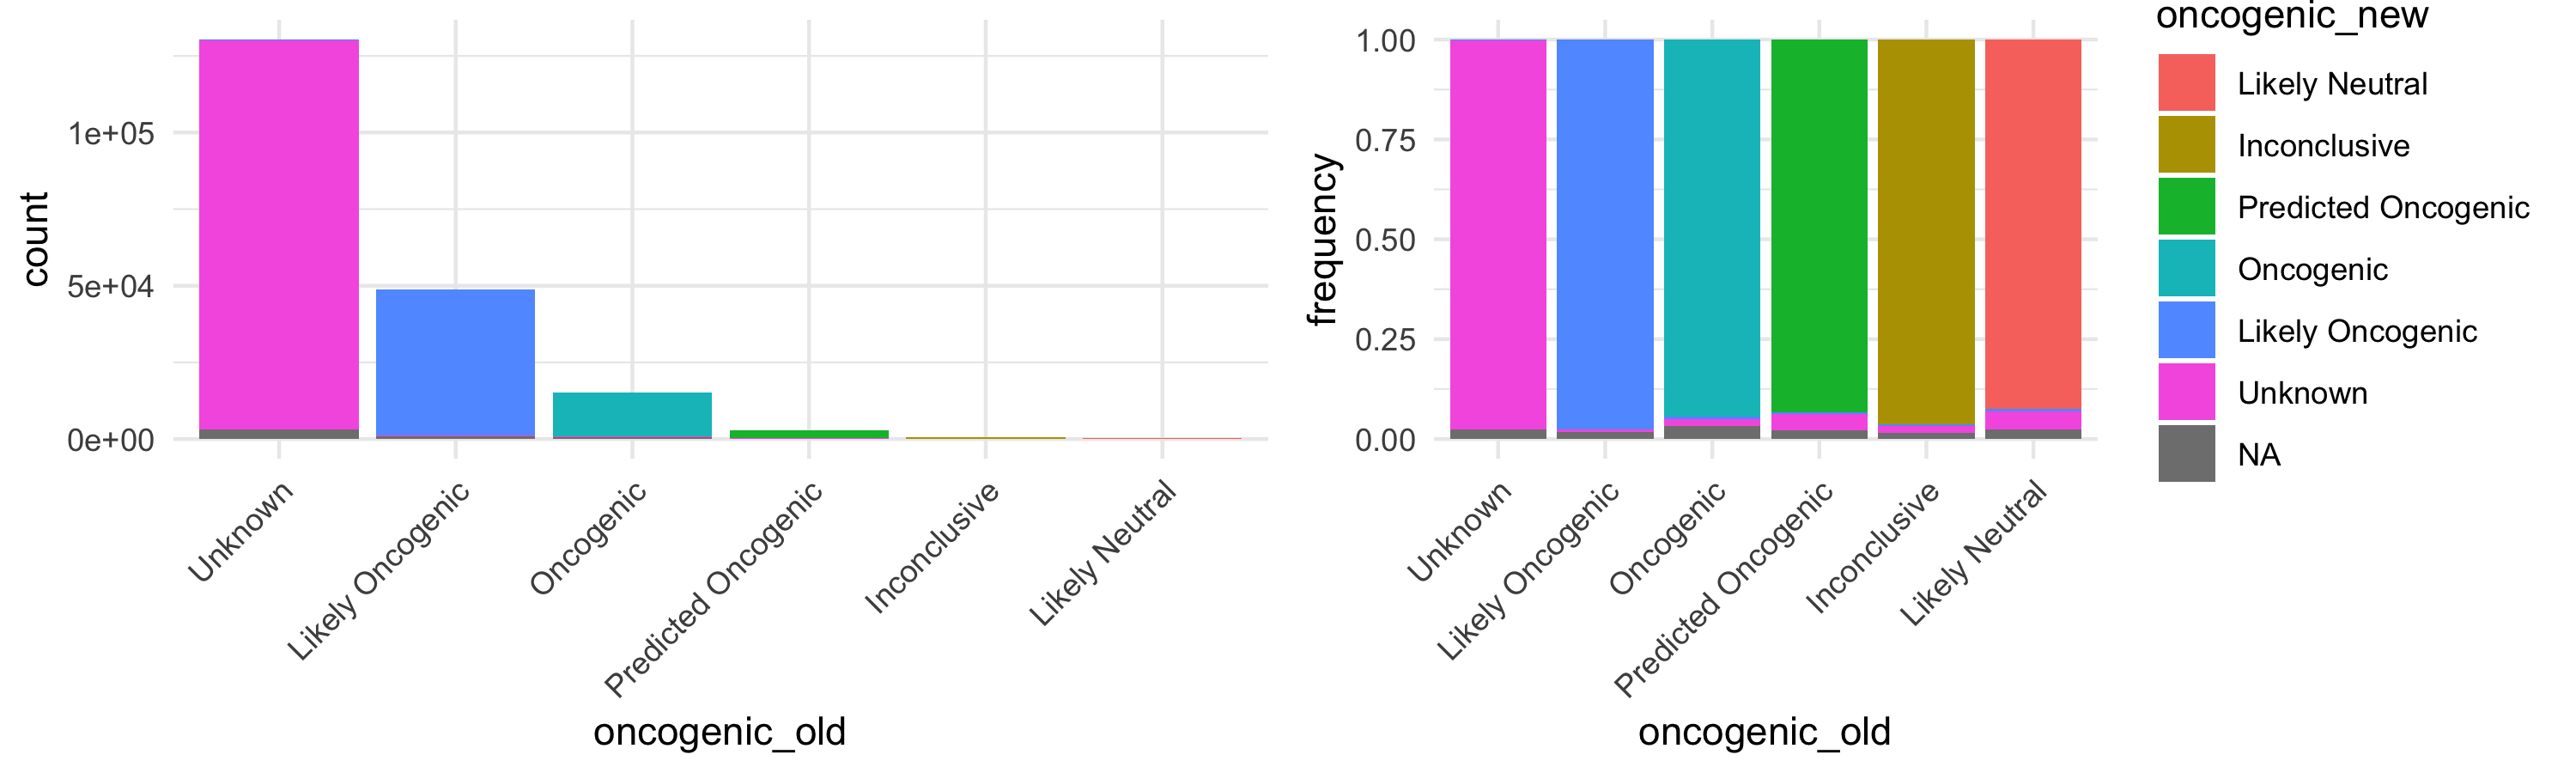

In [32]:
impact_old <- left_join(impact_old, impact[, c("sample_mut_key", "oncogenic", "VEP_Consequence")], by = c("sample_mut_key" = "sample_mut_key"))
colnames(impact_old)[colnames(impact_old) == "oncogenic.x"] <- "oncogenic_old"
colnames(impact_old)[colnames(impact_old) == "oncogenic.y"] <- "oncogenic_new"

plot_contingency_table_as_histograms(impact_old, "oncogenic_old", "oncogenic_new")